# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


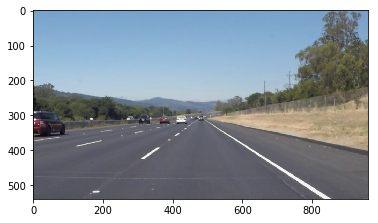

In [2]:
#reading in an image
image_1 = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image_1), 'with dimensions:', image_1.shape)
plt.imshow(image_1)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
def pipeline(image): # defining pipeline to draw red lines on image found by hough function
    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # converting image to gray
    kernel_size = 7 
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0) #using gaussian blur for noise removal from image
    edges = cv2.Canny(blur_gray, 30, 90)  # detecting bright edges using canny function
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   
    imshape = image.shape
    vertices = np.array([[(0,imshape[0]),(470,320), (520,320), (imshape[1],imshape[0])]], dtype=np.int32) # defining vertices of quadilateral mask
    cv2.fillPoly(mask, vertices, ignore_mask_color) 
    masked_edges = cv2.bitwise_and(edges, mask) # taking edges only inside the mask
    rho = 2
    theta = np.pi/180
    threshold = 30
    min_line_length =5
    max_line_gap = 3 # defining parameters for finding hough lines
    line_image = np.copy(image)*0 #creating a blank to draw lines on
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap) # finding lines using hough function
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10) # draing red on lines from hough lines
    color_edges = np.dstack((masked_edges,masked_edges,masked_edges)) 
    combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) # making combo of edges and red lines on them
    return combo # code same as given in examples

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

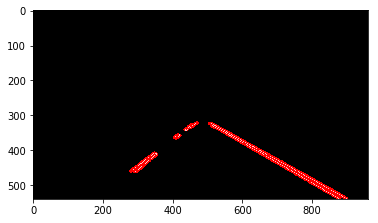

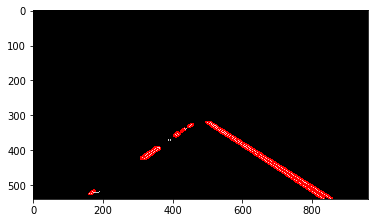

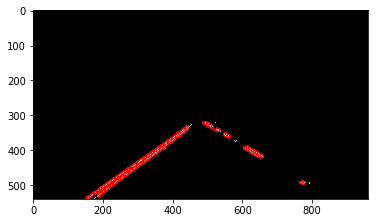

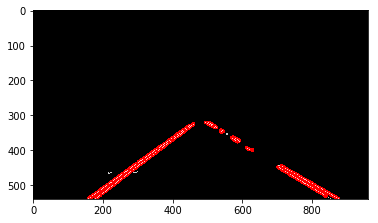

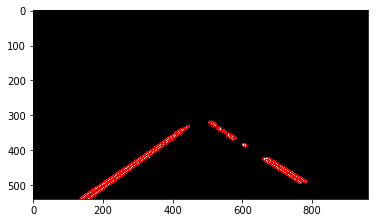

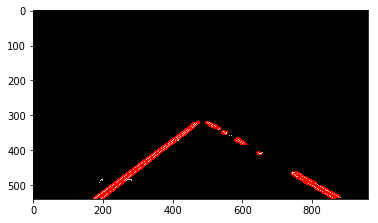

In [4]:
import os
os.listdir("test_images/")
imagefiles = os.listdir("test_images/") # taking all image files
for i in imagefiles: 
    if i.endswith(('.png', '.jpg', '.jpeg')): 
        image = mpimg.imread('test_images/' + i)
        testimage = pipeline(image) # implementing pipeline funciton on all images
        plt.figure()
        plt.imshow(testimage)
        plt.imsave('test_images_output/' +i, testimage) # saving images in test image output

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [5]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

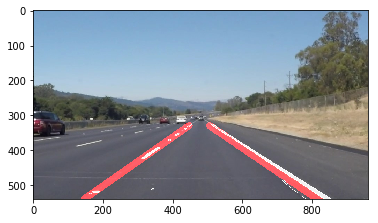

In [6]:
def process_image(image):

    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel_size = 7
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    edges = cv2.Canny(blur_gray,20,60)  
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   
    imshape = image.shape
    vertices = np.array([[(0,imshape[0]),(450,325), (520,325), (imshape[1],imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    rho = 2
    theta = np.pi/180
    threshold = 10
    min_line_length =10
    max_line_gap = 5
    line_image = np.copy(image)*0 #creating a blank to draw lines on
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap) # running same pipeline code to find lines
    leftx=[]
    lefty=[]
    rightx=[]
    righty=[] # defining empty array
    for line in lines:
        for x1,y1,x2,y2 in line:
            if x1 <= 480 and x2 <= 480 :
                leftx.append(x1)
                leftx.append(x2)
                lefty.append(y1)
                lefty.append(y2) # appending points in left lane to xleft and yleft
            elif x1 >= 500 and x2 >= 500:
                    rightx.append(x1)
                    rightx.append(x2)
                    righty.append(y1)
                    righty.append(y2) # appending points in righ lane to xright and yright
    
    leftfit = np.polyfit(leftx, lefty,1) # fitting line on left and right points to find slopes and intercepts
    rightfit = np.polyfit(rightx, righty,1)
    m_left = leftfit[0] # slope of left line
    b_left = leftfit[1] # intercept of left line
    m_right = rightfit[0] # slope of right line
    b_right = rightfit[1] # intercept of right line
   
    x3 = min(rightx)
    x4 = max(rightx) # finding minimum and maximum points to draw right line
    y3= m_right*x3 + b_right
    y4 = m_right*x4 + b_right
    
    y1 = y3 # making minimum y coordinate of left line equal to right line
    x1 = (y1 - b_left)/m_left # finding corresponding x from slopes and intercept
    y2 = 540 # making maximum y coordinate of left line equal to 540
    x2 = (y2 - b_left)/m_left # finding corresponding x from slopes and intercept
    
    if x3-x1<45: # if distance between minimum x of left and right lines decreases too much it causes overlapping of lines
        x1= x3-45 # to prevent this if distance is too less minimum of left line is reset to maintain appropriate distance
    
    
    x1 = int(x1)
    x2 = int(x2)
    x3 = int(x3)
    x4 = int(x4)
    y1 = int(y1)
    y2 = int(y2)
    y3 = int(y3)
    y4 = int(y4)
    
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),20)
    cv2.line(line_image,(x3,y3),(x4,y4),(255,0,0),20)        # drawing red right and left lines
    color_edges = np.dstack((masked_edges,masked_edges,masked_edges)) 
    combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
    result = cv2.addWeighted(combo, 1,image, 1, 0) # returning combo of colored image and red lines
    return result
image = mpimg.imread('test_images/solidWhiteRight.jpg')
v = process_image(image)
plt.imshow(v)



Let's try the one with the solid white lane on the right first ...

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [7]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|███████████████████████████████████████▊| 221/222 [00:22<00:00, 11.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

Wall time: 25.5 s


In [8]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [9]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|███████████████████████████████████████▉| 681/682 [01:05<00:00, 10.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

Wall time: 1min 7s


## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))